# WeatherPy
Note
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [117]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [118]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

# Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [119]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : kodiak
Processing Record 2 of Set 1 : port hedland
Processing Record 3 of Set 1 : lorengau
Processing Record 4 of Set 1 : castro
Processing Record 5 of Set 1 : praia
Processing Record 6 of Set 1 : tahta
Processing Record 7 of Set 1 : port blair
Processing Record 8 of Set 1 : solnechnyy
Processing Record 9 of Set 1 : thompson
Processing Record 10 of Set 1 : dicabisagan
Processing Record 11 of Set 1 : norman wells
Processing Record 12 of Set 1 : sola
Processing Record 13 of Set 1 : mahebourg
City not found. Skipping...
Processing Record 14 of Set 1 : muravlenko
Processing Record 15 of Set 1 : tezu
Processing Record 16 of Set 1 : broome
Processing Record 17 of Set 1 : ushuaia
Processing Record 18 of Set 1 : smolenka
Processing Record 19 of Set 1 : fallon
Processing Record 20 of Set 1 : port moresby
Processing Record 21 of Set 1 : georgetown
Processing Record 22 of Set 1 : rikitea
Processing Record 23 of

Processing Record 36 of Set 4 : baykit
Processing Record 37 of Set 4 : fortuna
Processing Record 38 of Set 4 : socorro
Processing Record 39 of Set 4 : souillac
Processing Record 40 of Set 4 : katsuura
Processing Record 41 of Set 4 : bijie
Processing Record 42 of Set 4 : ostersund
Processing Record 43 of Set 4 : faanui
Processing Record 44 of Set 4 : nyurba
Processing Record 45 of Set 4 : drumnadrochit
Processing Record 46 of Set 4 : tura
Processing Record 47 of Set 4 : yumen
Processing Record 48 of Set 4 : neiafu
Processing Record 49 of Set 4 : san cristobal
Processing Record 50 of Set 4 : jurm
City not found. Skipping...
Processing Record 0 of Set 5 : necochea
Processing Record 1 of Set 5 : nuwara eliya
Processing Record 2 of Set 5 : riyadh
Processing Record 3 of Set 5 : mercedes
Processing Record 4 of Set 5 : mehamn
City not found. Skipping...
Processing Record 5 of Set 5 : lompoc
Processing Record 6 of Set 5 : comodoro rivadavia
Processing Record 7 of Set 5 : leshukonskoye
Processin

Processing Record 22 of Set 8 : japura
Processing Record 23 of Set 8 : achacachi
Processing Record 24 of Set 8 : port lincoln
Processing Record 25 of Set 8 : hudson bay
Processing Record 26 of Set 8 : hovd
Processing Record 27 of Set 8 : ayolas
Processing Record 28 of Set 8 : malakal
Processing Record 29 of Set 8 : wajir
Processing Record 30 of Set 8 : numaran
City not found. Skipping...
Processing Record 31 of Set 8 : alyangula
Processing Record 32 of Set 8 : gornopravdinsk
Processing Record 33 of Set 8 : alofi
Processing Record 34 of Set 8 : hualmay
Processing Record 35 of Set 8 : sao joao da barra
City not found. Skipping...
Processing Record 36 of Set 8 : mandera
Processing Record 37 of Set 8 : mizdah
Processing Record 38 of Set 8 : maryville
Processing Record 39 of Set 8 : ojinaga
Processing Record 40 of Set 8 : suntar
Processing Record 41 of Set 8 : ivaipora
Processing Record 42 of Set 8 : kiunga
Processing Record 43 of Set 8 : mezen
City not found. Skipping...
Processing Record 

# Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [120]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [121]:
weather_dict.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [122]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Paul Harbor,90,US,1592314738,87,57.79,-152.41,50.00,13.87
1,Port Hedland,0,AU,1592314738,68,-20.32,118.57,68.00,6.93
2,Lorengau,63,PG,1592314738,75,-2.02,147.27,82.63,7.85
3,Castro,89,BR,1592314738,82,-24.79,-50.01,61.45,7.87
4,Praia,20,CV,1592314738,66,14.92,-23.51,86.00,5.82
...,...,...,...,...,...,...,...,...,...
545,Drayton Valley,29,CA,1592314775,85,53.22,-114.99,53.01,5.99
546,Gijang,100,KR,1592314522,40,35.24,129.21,73.40,5.82
547,Santa Isabel Rio Negro,23,BR,1592314526,87,-0.41,-65.02,80.89,2.44
548,Mattawa,83,US,1592314775,93,46.74,-119.90,51.01,7.54


In [123]:
# Save city data into a csv file
weather_dict.to_csv("../output_data/cities.csv", index = False)

# Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [124]:
weather_dict.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,550.000000,5.500000e+02,550.000000,550.000000,550.000000,550.000000,550.000000
mean,49.349091,1.592315e+09,65.549091,19.532364,22.549727,69.767200,8.081782
std,38.485419,6.868518e+01,23.077212,33.698903,90.638945,15.622184,5.204343
min,0.000000,1.592314e+09,1.000000,-54.800000,-175.200000,28.400000,0.130000
25%,8.000000,1.592315e+09,52.000000,-8.767500,-57.395000,57.990000,4.000000
50%,40.000000,1.592315e+09,71.000000,25.055000,29.040000,72.060000,6.930000
75%,90.000000,1.592315e+09,83.000000,47.467500,102.277500,81.000000,11.410000
max,100.000000,1.592315e+09,100.000000,78.220000,179.320000,114.150000,24.610000


In [125]:
#  Get the indices of cities that have humidity over 100%.

In [126]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_dict_values = weather_dict.dropna()
weather_dict_values = weather_dict_values.reset_index(drop=True)

weather_dict_values.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Paul Harbor,90,US,1592314738,87,57.79,-152.41,50.00,13.87
1,Port Hedland,0,AU,1592314738,68,-20.32,118.57,68.00,6.93
2,Lorengau,63,PG,1592314738,75,-2.02,147.27,82.63,7.85
3,Castro,89,BR,1592314738,82,-24.79,-50.01,61.45,7.87
4,Praia,20,CV,1592314738,66,14.92,-23.51,86.00,5.82


# Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

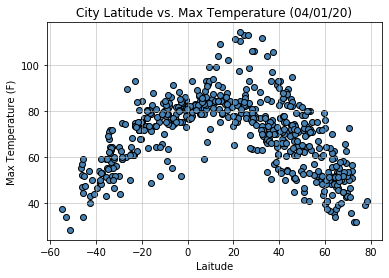

In [127]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

# Latitude vs. Humidity Plot

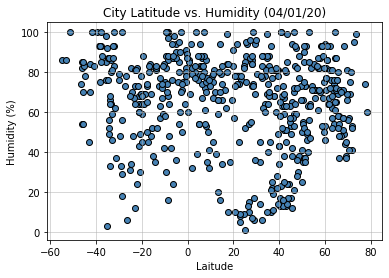

In [128]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

# Latitude vs. Cloudiness Plot

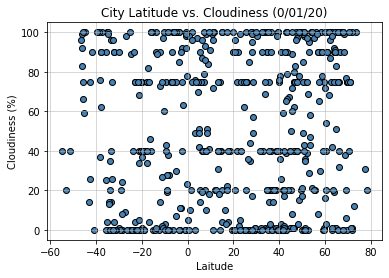

In [129]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (0/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

# Latitude vs. Wind Speed Plot

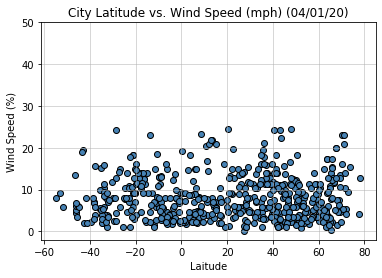

In [130]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

# Linear Regression

In [131]:
# Create Northern and Southern Hemisphere DataFrames

North_df = weather_dict.loc[weather_dict['Lat'] >=0]
South_df = weather_dict.loc[weather_dict['Lat'] < 0]

In [132]:
North_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Paul Harbor,90,US,1592314738,87,57.79,-152.41,50.00,13.87
4,Praia,20,CV,1592314738,66,14.92,-23.51,86.00,5.82
5,Ţahţā,0,EG,1592314738,15,26.77,31.50,98.60,5.82
6,Port Blair,100,IN,1592314738,81,11.67,92.75,83.26,14.47
7,Solnechnyy,98,RU,1592314738,85,50.72,136.63,44.82,6.96


In [133]:
South_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Port Hedland,0,AU,1592314738,68,-20.32,118.57,68.00,6.93
2,Lorengau,63,PG,1592314738,75,-2.02,147.27,82.63,7.85
3,Castro,89,BR,1592314738,82,-24.79,-50.01,61.45,7.87
11,Sola,100,VU,1592314738,81,-13.88,167.55,81.00,23.15
12,Mahébourg,40,MU,1592314738,69,-20.41,57.70,73.40,9.17


# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

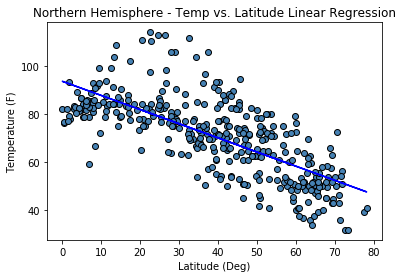

In [134]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = North_df['Lat'].astype('float')
y_values = North_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value=" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="steelblue", edgecolor="black")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(5, 25),fontsize=15,color="yellow")
plt.annotate(rvalue,(5,17),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Temperature (F)')
plt.title(f"Northern Hemisphere - Temp vs. Latitude Linear Regression")

# Show plot
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

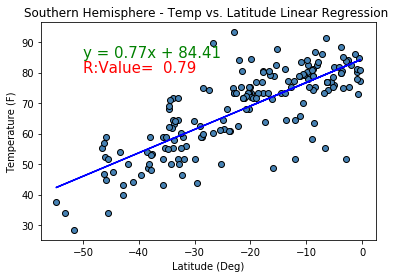

In [135]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = South_df['Lat'].astype('float')
y_values = South_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value=" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="steelblue", edgecolor= "black")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(-50, 85),fontsize=15,color="green")
plt.annotate(rvalue,(-50, 80),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Temperature (F)')
plt.title(f"Southern Hemisphere - Temp vs. Latitude Linear Regression ")

# Show plot
plt.show()

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

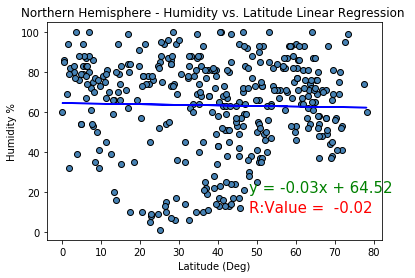

In [136]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = North_df['Lat'].astype('float')
y_values = North_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="steelblue", edgecolor="black")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(48,20),fontsize=15,color="green")
plt.annotate(rvalue,(48, 10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Humidity %')
plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression ")

# Show plot
plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

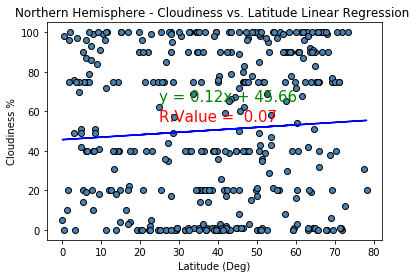

In [137]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = North_df['Lat'].astype('float')
y_values = North_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="steelblue", edgecolor="black")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(25,65),fontsize=15,color="green")
plt.annotate(rvalue,(25, 55),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Cloudiness %')
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression ")

# Show plot
plt.show()


# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

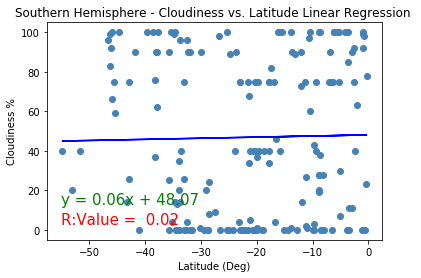

In [138]:
x_values = South_df['Lat'].astype('float')
y_values = South_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="steelblue")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(-55,13),fontsize=15,color="green")
plt.annotate(rvalue,(-55, 3),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Cloudiness %')
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression ")

# Show plot
plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

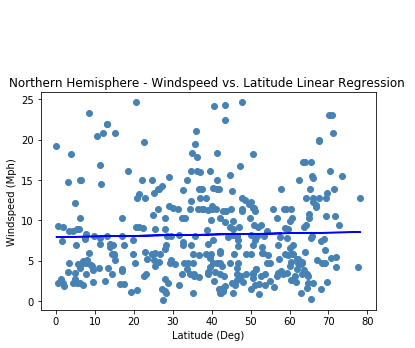

In [139]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = North_df['Lat'].astype('float')
y_values = North_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="steelblue")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(10,35),fontsize=15,color="green")
plt.annotate(rvalue,(10, 31),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Windspeed (Mph)')
plt.title(f"Northern Hemisphere - Windspeed vs. Latitude Linear Regression ")

# Show plot
plt.show()

# southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

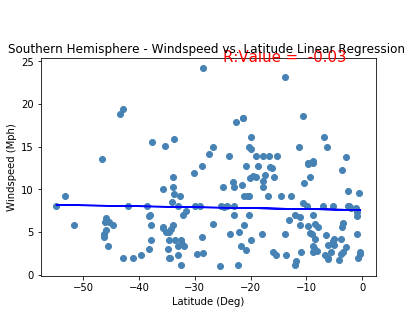

In [141]:
x_values = South_df['Lat'].astype('float')
y_values = South_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="steelblue")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="green")
plt.annotate(rvalue,(-25, 25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Windspeed (Mph)')
plt.title(f"Southern Hemisphere - Windspeed vs. Latitude Linear Regression ")

# Show plot
plt.show()